<a href="https://colab.research.google.com/github/ErenB02/Proteomics_Project/blob/main/MSC_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
##Libraries
from sklearn import model_selection
import pandas as pd
import numpy as np


# **Cord Blood Analysis Models**


### **Import datasets**


In [380]:
"""MSc Project 2025
   Eren Boybay
   01/08/2025"""

##BASELINE (cord blood)
#Full set of proteins
BL_prot = pd.read_csv("BL_prot_full.csv")

# #Full set of peptides
# BL_pep_full = pd.read_csv(url)
BL_pep = pd.read_csv("BL_pep_full.csv")


# #Proteins + Clinical (combined)
BL_prot_comb = pd.read_csv("BL_prot_comb.csv")


# #Peptides + Clinical (combined)
BL_pep_comb = pd.read_csv("BL_pep_comb.csv")



# #Peptides (sig only)
# BL_pep_sig = pd.read_csv(url)


# #Peptides + Clinical (sig + clinical)
# BL_pep_sig_comb = pd.read_csv(url)


In [381]:
# #Check column classes and format
print(BL_prot.value_counts('Condition'))
print(BL_prot.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_prot.shape)
del BL_prot['BioReplicate']
print(BL_prot.shape)

Condition
Control    42
Case       22
Name: count, dtype: int64
       KLKB1       HEP2       A2MG        IC1       A2AP
0  23.726412  23.995709  23.184520  22.173751  22.113733
1  24.327342  23.748462  24.511435  23.598822  23.028244
2  24.783129  24.488957  24.415013  24.568131  25.042863
3  23.847265  24.124445  24.272973  23.822803  23.993504
4  24.368995  23.986996  24.373690  23.814763  23.623496
(64, 38)
(64, 37)


In [382]:
# #Check column classes and format (peptide)
print(BL_pep.value_counts('Condition'))
print(BL_pep.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_pep.shape)
del BL_pep['BioReplicate']
print(BL_pep.shape)

Condition
Control    42
Case       22
Name: count, dtype: int64
   BioReplicate  GGDVASMYTPNAQYCQMR  TGAVSGHSLK  QCGHQISACHR  VSSVEECQK
0             1           13.292609   13.060020    13.927130  11.903882
1             2           14.851895   14.655922    15.227240  14.703525
2             3           15.444724   13.627306    14.437362  11.945444
3             4           14.411643   14.575835    11.869979  15.891048
4             5           15.286774   14.721847    12.899735  16.821662
(64, 1090)
(64, 1089)


### **Pre-processing & Feature Selection**

In [383]:
#Remove trailing space (found in 'Case ')
BL_prot['Condition'] = BL_prot['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep['Condition'] = BL_pep['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


/tmp/ipython-input-1099701665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-1099701665.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


*Features and Target*

In [384]:
#Features (all proteins)
X_prot =  BL_prot.iloc[:,:36]
#Label (Case - Control (object))
y_prot = BL_prot['Condition']
print(X_prot.shape)
print(y_prot.shape)


#Features (all peptides)
X_pep =  BL_pep.iloc[:,:1088]
y_pep = BL_pep['Condition']
print(X_pep.shape)
print(y_pep.shape)

(64, 36)
(64,)
(64, 1088)
(64,)


In [385]:
#Check for NaN values
print(f"There are {X_prot.isna().sum().sum()} NaN values present in the peptide features")
print(f"There are {X_pep.isna().sum().sum()} NaN values present in the peptide features")

X_pep = X_pep.fillna(0)


There are 0 NaN values present in the peptide features
There are 2 NaN values present in the peptide features


##**Combined Data**

In [386]:
# #Check column classes and format
print(BL_prot_comb.value_counts('Condition'))
print(BL_prot_comb.shape)

print(BL_prot_comb.describe())
BL_prot_comb.head(5)


Condition
Control    42
Case       22
Name: count, dtype: int64
(64, 176)
           KLKB1       HEP2       A2MG        IC1       A2AP       FHR1  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean   24.139730  24.391843  24.074059  24.074538  24.160292  24.132500   
std     0.651814   0.636287   0.613451   0.602371   0.672148   0.709558   
min    21.859261  22.875634  22.154086  22.004957  22.113733  21.823117   
25%    23.756941  24.018992  23.867318  23.849801  23.926216  24.002254   
50%    24.272800  24.272800  24.272800  24.272800  24.272800  24.272800   
75%    24.617359  24.848195  24.430395  24.456579  24.522097  24.594537   
max    25.403335  25.930509  24.832673  24.797514  25.343415  25.118152   

            ANT3        CO9        CO2        FA9  ...  f26_head_circum  \
count  64.000000  64.000000  64.000000  64.000000  ...        64.000000   
mean   24.109926  24.219416  24.085644  24.064608  ...        34.768750   
std     0.571755   1.0344

,KLKB1,HEP2,A2MG,IC1,A2AP,FHR1,ANT3,CO9,CO2,FA9,...,f26_length,f34_pet,f34_sga,f34_sptb,f39_uncomplicated_preg_clin,f39_uncomplicated_preg_lab,f14_age,f14_pat_socioeconomic_index,X,Condition
0,23.726412,23.995709,23.184520,22.173751,22.113733,22.309099,22.373840,23.141651,21.845234,21.974859,...,48.000000,0,1,0,0,0,33,34,1,Control
1,24.327342,23.748462,24.511435,23.598822,23.028244,24.095794,23.806854,24.761661,23.456435,23.932758,...,53.200001,0,0,0,1,1,24,32,4,Control
2,24.783129,24.488957,24.415013,24.568131,25.042863,25.118152,24.603673,26.654126,24.777946,24.532652,...,48.500000,0,0,0,0,0,35,46,7,Control
3,23.847265,24.124445,24.272973,23.822803,23.993504,24.297272,24.011108,23.058305,23.560701,24.271186,...,49.500000,0,0,0,0,0,29,50,10,Case
4,24.368995,23.986996,24.373690,23.814763,23.623496,23.878161,23.896840,22.948299,23.412159,23.880243,...,51.900002,0,0,0,0,0,-99,-99,13,Case


In [387]:
#Remove the other labels, retain only one to avoid data leakage (Condition)
del[BL_prot_comb['Label']]
del[BL_prot_comb['Case.Control']]
del[BL_prot_comb['X']]
del[BL_prot_comb['BioReplicate']]

del[BL_pep_comb['Label']]
del[BL_pep_comb['Case.Control']]
del[BL_pep_comb['X']]
del[BL_pep_comb['BioReplicate']]



In [388]:
#Remove redundant and unessecary columns (demographic data)

del[BL_prot_comb['BabyID']]
del[BL_prot_comb['MotherIDinSCOPE_first']]
del[BL_prot_comb['Sex']]

del[BL_pep_comb['BabyID']]
del[BL_pep_comb['MotherIDinSCOPE_first']]
del[BL_pep_comb['Sex']]

#Same for clinical data
del[BL_prot_comb['Compound']]
del[BL_pep_comb['Compound']]

#Remove columns consisting of only 0
print(f"Prior to column removal: {BL_prot_comb.shape}")
BL_prot_comb = BL_prot_comb.loc[:, (BL_prot_comb != 0).any(axis=0)]
print(f"After column removal: {BL_prot_comb.shape}")

print(f"Prior to column removal: {BL_pep_comb.shape}")
BL_pep_comb = BL_pep_comb.loc[:, (BL_pep_comb != 0).any(axis=0)]
print(f"After column removal: {BL_pep_comb.shape}")


Prior to column removal: (64, 168)
After column removal: (64, 161)
Prior to column removal: (64, 1220)
After column removal: (64, 1213)


In [389]:
#Check for NaN values
print(f"There are {BL_prot_comb.isna().sum().sum()} NaN values present in the combined protein features")
print(f"There are {BL_pep_comb.isna().sum().sum()} NaN values present in the combined peptide features")

#Replace NaN values with 0
BL_prot_comb = BL_prot_comb.fillna(0)
BL_pep_comb = BL_pep_comb.fillna(0)

There are 16 NaN values present in the combined protein features
There are 18 NaN values present in the combined peptide features


In [390]:
#Select numeric columns only
numeric_cols_prot = BL_prot_comb.select_dtypes(include=[np.number]).columns
numeric_cols_pep = BL_pep_comb.select_dtypes(include=[np.number]).columns


#Replace all negatives values with 0
BL_prot_comb[numeric_cols_prot] = BL_prot_comb[numeric_cols_prot].clip(lower=0)
BL_pep_comb[numeric_cols_pep] = BL_pep_comb[numeric_cols_pep].clip(lower=0)

In [391]:
#Remove trailing space (found in 'Case ')
BL_prot_comb['Condition'] = BL_prot_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep_comb['Condition'] = BL_pep_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)

/tmp/ipython-input-3960454167.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-3960454167.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [392]:
#Obtain label position (prot_comb)
print(BL_prot_comb.columns.get_loc('Condition'))
print(BL_prot_comb.shape)

160
(64, 161)


In [393]:
#Obtain label position (prot_comb)
print(BL_pep_comb.columns.get_loc('Condition'))
print(BL_pep_comb.shape)

1212
(64, 1213)


In [394]:
#Features (all proteins + clin data)
X_prot_comb =  BL_prot_comb.iloc[:,:160]

#Label (Case - Control (object))
y_prot_comb = BL_prot_comb['Condition']
print(f"Combined protein data feature and label shape: ")
print(X_prot_comb.shape)
print(y_prot_comb.shape)


#Features (all peptides + clin data)
X_pep_comb =  BL_pep_comb.iloc[:,:1212]

#Label (Case - Control (object))
y_pep_comb = BL_pep_comb['Condition']
print(f"Combined peptide data feature and label shape: ")
print(X_pep_comb.shape)
print(y_pep_comb.shape)


Combined protein data feature and label shape: 
(64, 160)
(64,)
Combined peptide data feature and label shape: 
(64, 1212)
(64,)


## **Model Training and prediction on full set data**

**Protein Data Only**

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import RocCurveDisplay, auc

import matplotlib.pyplot as plt
cv = 6

#Logistic Regression (protein only data)
lrc = LogisticRegression(penalty="l1", solver="liblinear", random_state=25)

lr_cv_res_prot = cross_validate(lrc, X_prot, y_prot, cv = cv,
                                return_estimator= True, return_indices= True)

#Random Forest (protein only data)
rfc = RandomForestClassifier(criterion="gini", random_state=25)

rf_cv_res_prot = cross_validate(rfc, X_prot, y_prot, cv = cv,
                                return_estimator= True, return_indices= True)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Combined protein data**

In [396]:
#Logistic Regression (prot combined data)

lr_cv_res_prot_comb = cross_validate(lrc, X_prot_comb, y_prot_comb, cv = cv,
                                return_estimator= True, return_indices= True)

#Random Forest (prot combined data)

rf_cv_res_prot_comb = cross_validate(rfc, X_prot_comb, y_prot_comb, cv = cv,
                                return_estimator= True, return_indices= True)


**Peptide Data Only**



In [397]:
#Logistic Regression (pep combined data)

lr_cv_res_pep = cross_validate(lrc, X_pep, y_pep, cv = cv,
                                return_estimator= True, return_indices= True)

#Random Forest (pep combined data)

rf_cv_res_pep = cross_validate(rfc, X_pep, y_pep, cv = cv,
                                return_estimator= True, return_indices= True)

**Combined peptide Data**

In [398]:
#Logistic Regression (pep combined data)

lr_cv_res_pep_comb = cross_validate(lrc, X_pep_comb, y_pep_comb, cv = cv,
                                return_estimator= True, return_indices= True)

#Random Forest (pep combined data)

rf_cv_res_pep_comb = cross_validate(rfc, X_pep_comb, y_pep_comb, cv = cv,
                                return_estimator= True, return_indices= True)

### **ROC analysis and classification (protein)**

---



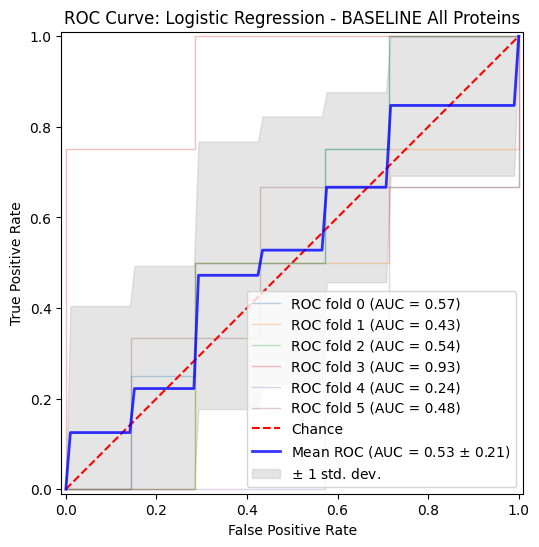

In [399]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    lr_cv_res_prot,
    X_prot,
    y_prot,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE All Proteins")
ax.legend(loc="lower right")
plt.show()

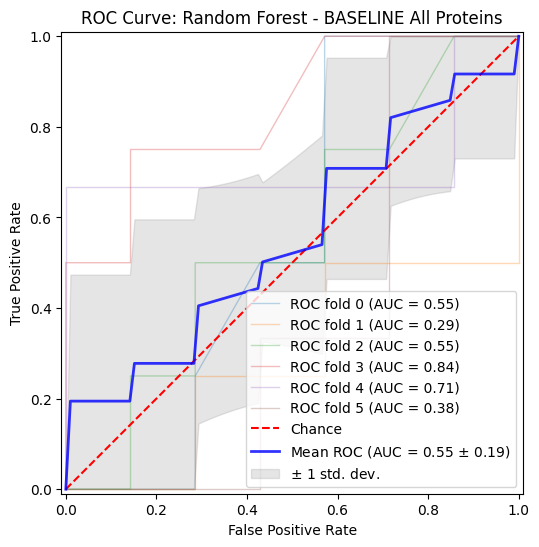

In [400]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    rf_cv_res_prot,
    X_prot,
    y_prot,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE All Proteins")
ax.legend(loc="lower right")
plt.show()

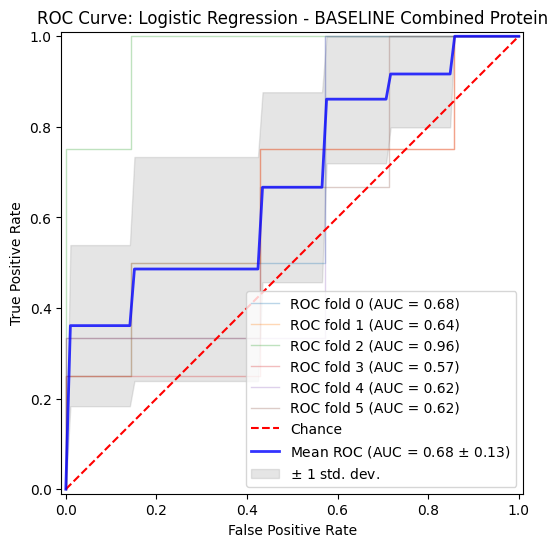

In [401]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    lr_cv_res_prot_comb,
    X_prot_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE Combined Protein")
ax.legend(loc="lower right")
plt.show()

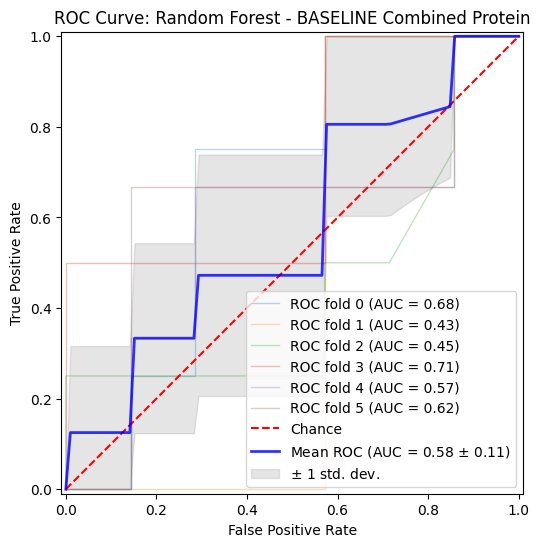

In [402]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    rf_cv_res_prot_comb,
    X_prot_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE Combined Protein")
ax.legend(loc="lower right")
plt.show()

### **ROC Analysis & Classification (peptide)**

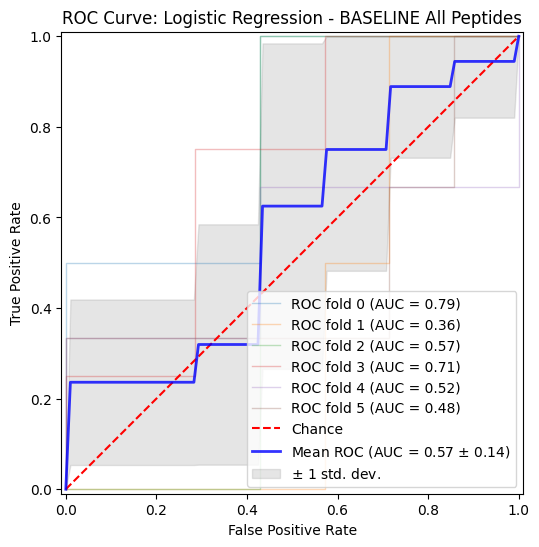

In [403]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    lr_cv_res_pep,
    X_pep,
    y_pep,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE All Peptides")
ax.legend(loc="lower right")
plt.show()

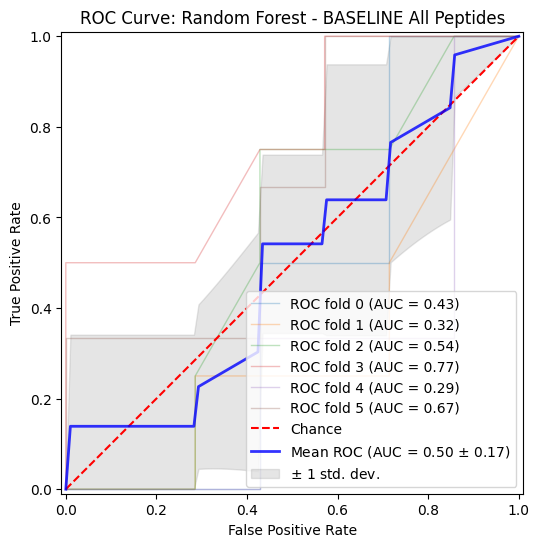

In [404]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    rf_cv_res_pep,
    X_pep,
    y_pep,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE All Peptides")
ax.legend(loc="lower right")
plt.show()

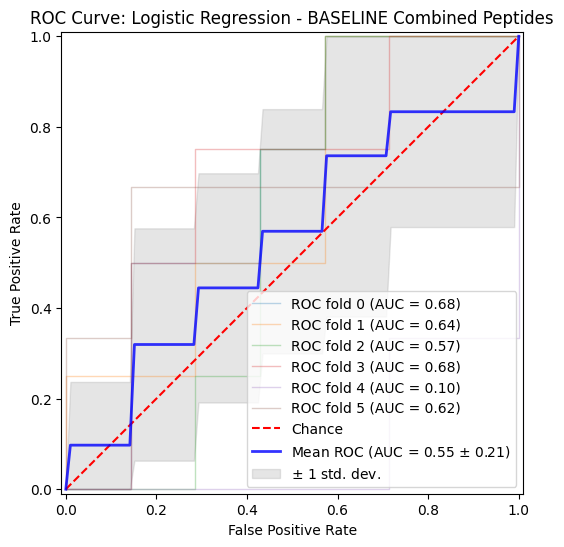

In [405]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    lr_cv_res_pep_comb,
    X_pep_comb,
    y_pep_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE Combined Peptides")
ax.legend(loc="lower right")
plt.show()

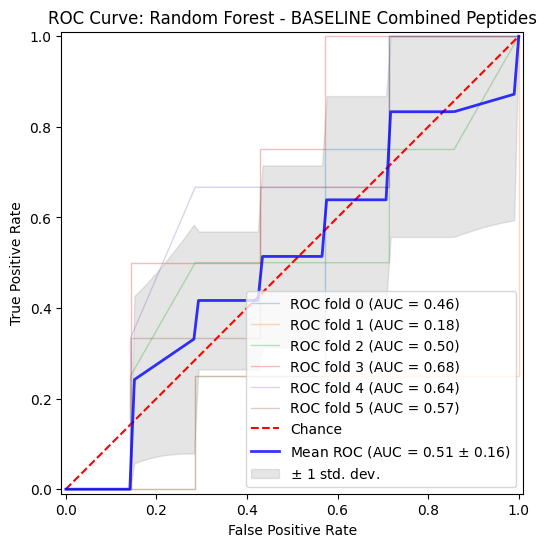

In [406]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    rf_cv_res_pep_comb,
    X_pep_comb,
    y_pep_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE Combined Peptides")
ax.legend(loc="lower right")
plt.show()

## **Model training and prediciton on Top 20 features**

**Combined proteins set**

In [407]:
# Logistic Regression
lr_coefs_prot_comb = np.array([est.coef_[0] for est in lr_cv_res_prot_comb["estimator"]])
lr_mean_coef_prot_t20 = np.mean(np.abs(lr_coefs_prot_comb), axis=0)
lr_feature_ranking = pd.Series(lr_mean_coef_prot_t20, index=X_prot_comb.columns).sort_values(ascending=False)
top20_lr_features_prot_comb = lr_feature_ranking.head(20).index.tolist()

# Random Forest
rf_importances_prot_comb = np.array([est.feature_importances_ for est in rf_cv_res_prot_comb["estimator"]])
rf_mean_importance_prot_t20 = np.mean(rf_importances_prot_comb, axis=0)
rf_feature_ranking = pd.Series(rf_mean_importance_prot_t20, index=X_prot_comb.columns).sort_values(ascending=False)
top20_rf_features_prot_comb = rf_feature_ranking.head(20).index.tolist()

In [408]:
#Subset dataset to top 20 features
X_lr_top20_prot_comb = X_prot_comb[top20_lr_features_prot_comb]
X_rf_top20_prot_comb = X_prot_comb[top20_rf_features_prot_comb]

In [409]:
#Retrain models on top 20 features
top20_lr_prot_comb = cross_validate(lrc, X_lr_top20_prot_comb, y_prot_comb, cv = cv,
                                return_estimator= True, return_indices= True)

top20_rfc_prot_comb = cross_validate(rfc, X_rf_top20_prot_comb, y_prot_comb, cv=cv,
                                return_estimator= True, return_indices= True)


**Full set (peptides)**

In [410]:
# Logistic Regression
lr_coefs_pep = np.array([est.coef_[0] for est in lr_cv_res_pep["estimator"]])
lr_mean_coef_pep = np.mean(np.abs(lr_coefs_pep), axis=0)
lr_feature_ranking = pd.Series(lr_mean_coef_pep, index=X_pep.columns).sort_values(ascending=False)
top20_lr_features_pep = lr_feature_ranking.head(20).index.tolist()

# Random Forest
rf_importances_pep = np.array([est.feature_importances_ for est in rf_cv_res_pep["estimator"]])
rf_mean_importance_pep = np.mean(rf_importances_pep, axis=0)
rf_feature_ranking = pd.Series(rf_mean_importance_pep, index=X_pep.columns).sort_values(ascending=False)
top20_rf_features_pep = rf_feature_ranking.head(20).index.tolist()

In [411]:
#Subset dataset to top 20 features
X_lr_top20_pep = X_pep[top20_lr_features_pep]
X_rf_top20_pep = X_pep[top20_rf_features_pep]

In [412]:
#Retrain models on top 20 features
top20_lr_pep = cross_validate(lrc, X_lr_top20_pep, y_pep, cv = cv,
                                return_estimator= True, return_indices= True)

top20_rfc_pep = cross_validate(rfc, X_rf_top20_pep, y_pep, cv=cv,
                                return_estimator= True, return_indices= True)

**Combined peptides**


In [413]:
# Logistic Regression
lr_coefs_pep_comb = np.array([est.coef_[0] for est in lr_cv_res_pep_comb["estimator"]])
lr_mean_coef_pep_comb = np.mean(np.abs(lr_coefs_pep_comb), axis=0)
lr_feature_ranking = pd.Series(lr_mean_coef_pep_comb, index=X_pep_comb.columns).sort_values(ascending=False)
top20_lr_features_pep_comb = lr_feature_ranking.head(20).index.tolist()

# Random Forest
rf_importances_pep_comb = np.array([est.feature_importances_ for est in rf_cv_res_pep_comb["estimator"]])
rf_mean_importance_pep_comb = np.mean(rf_importances_pep_comb, axis=0)
rf_feature_ranking = pd.Series(rf_mean_importance_pep_comb, index=X_pep_comb.columns).sort_values(ascending=False)
top20_rf_features_pep_comb = rf_feature_ranking.head(20).index.tolist()

In [414]:
#Subset dataset to top 20 features
X_lr_top20_pep_comb = X_pep_comb[top20_lr_features_pep_comb]
X_rf_top20_pep_comb = X_pep_comb[top20_rf_features_pep_comb]

In [415]:
#Retrain models on top 20 features
top20_lr_pep_comb = cross_validate(lrc, X_lr_top20_pep_comb, y_pep_comb, cv = cv,
                                return_estimator= True, return_indices= True)

top20_rfc_pep_comb = cross_validate(rfc, X_rf_top20_pep_comb, y_pep_comb, cv=cv,
                                return_estimator= True, return_indices= True)

### **Plotting ROC_AUC**

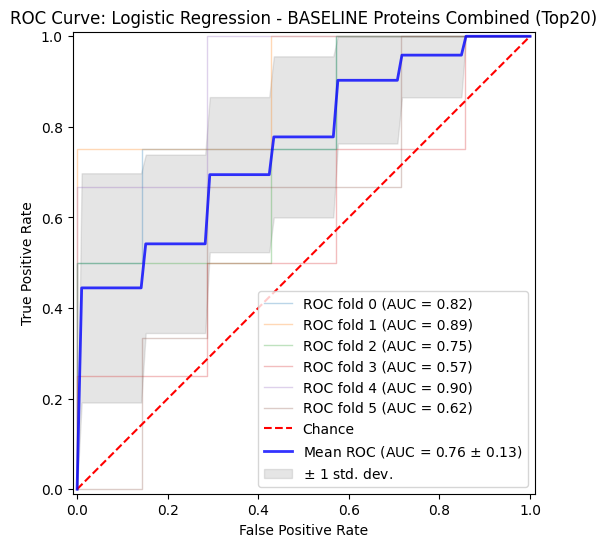

In [416]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_lr_prot_comb,
    X_lr_top20_prot_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE Proteins Combined (Top20)")
ax.legend(loc="lower right")
plt.show()


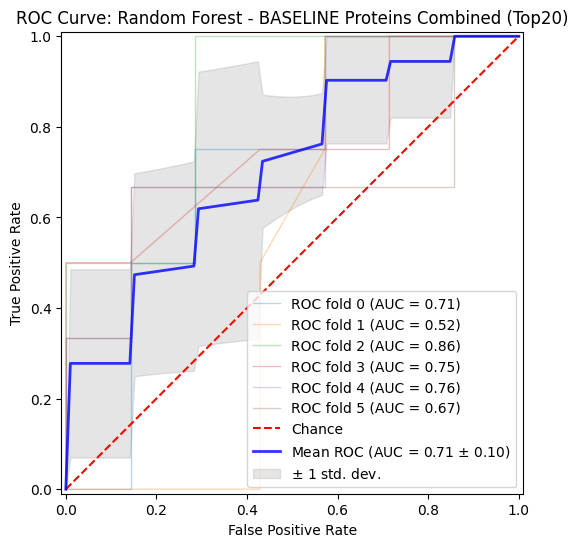

In [417]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_rfc_prot_comb,
    X_rf_top20_prot_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE Proteins Combined (Top20)")
ax.legend(loc="lower right")
plt.show()

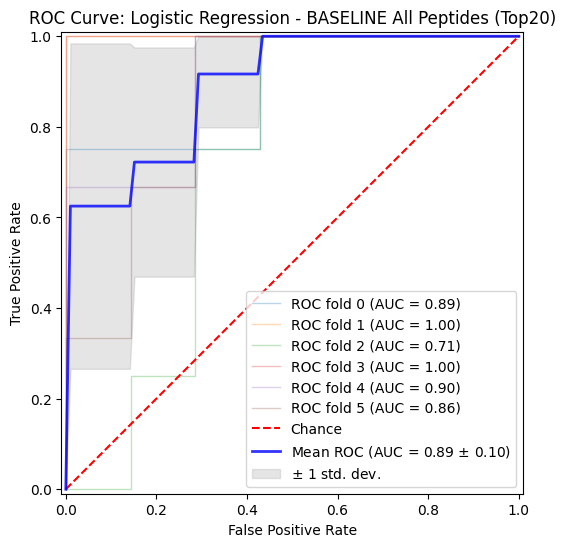

In [418]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_lr_pep,
    X_lr_top20_pep,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE All Peptides (Top20)")
ax.legend(loc="lower right")
plt.show()


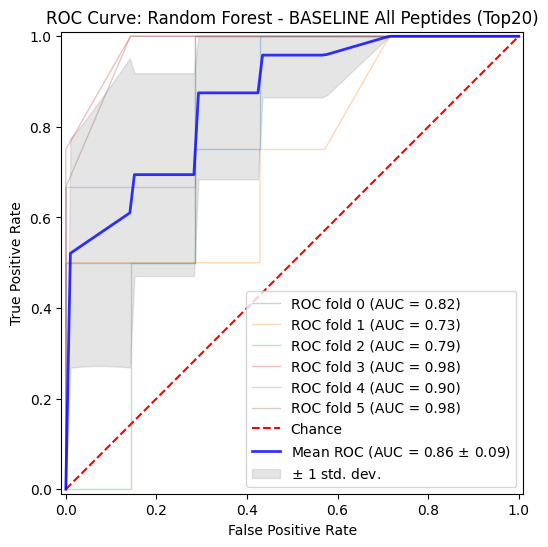

In [419]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_rfc_pep,
    X_rf_top20_pep,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE All Peptides (Top20)")
ax.legend(loc="lower right")
plt.show()

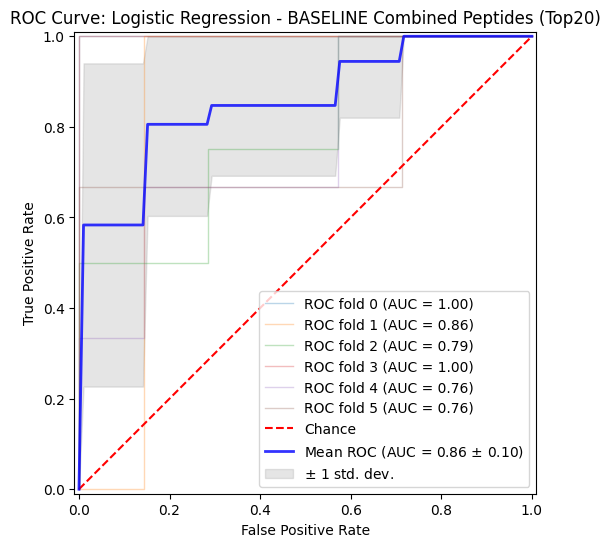

In [420]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_lr_pep_comb,
    X_lr_top20_pep_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Logistic Regression - BASELINE Combined Peptides (Top20)")
ax.legend(loc="lower right")
plt.show()


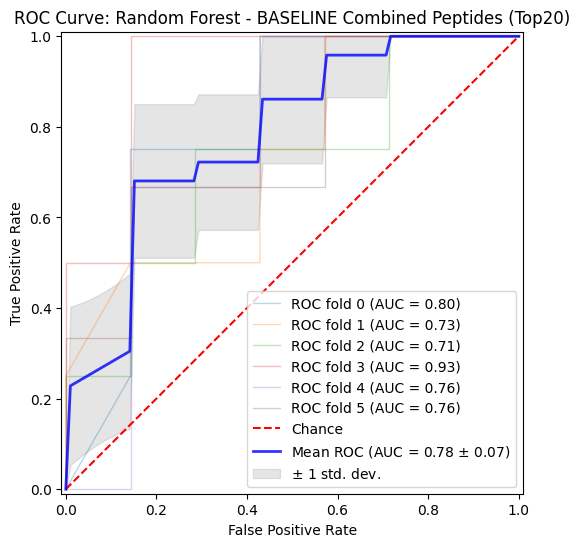

In [421]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(cv)
]
names = [f"ROC fold {idx}" for idx in range(cv)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    top20_rfc_pep_comb,
    X_rf_top20_pep_comb,
    y_prot_comb,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list)

for idx in range(cv):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot([0,1], [0,1], 'r--', label='Chance')
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,

)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Random Forest - BASELINE Combined Peptides (Top20)")
ax.legend(loc="lower right")
plt.show()

## **Feature Importance for best models (proteins)**

**Protein and protein combined**

In [422]:
# Collect feature importances (LR)
coefs_prot = np.array([est.coef_[0] for est in lr_cv_res_prot["estimator"]])
mean_coef_prot = np.mean(np.abs(coefs_prot), axis=0)


fimp_df_prot_lr = pd.DataFrame({
    "mean_importance": mean_coef_prot,
}, index= X_prot.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-2431251544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


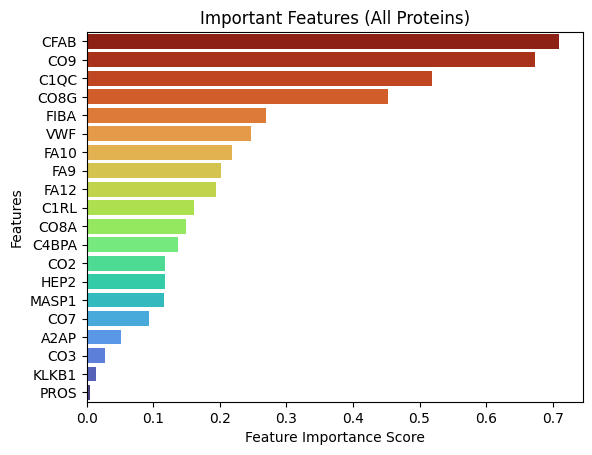

In [423]:
import seaborn as sns
# Select top 20 features
top_features_prot = fimp_df_prot_lr.head(20)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot.index,
    data=top_features_prot,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (All Proteins)')
plt.show()


In [424]:
# Collect feature importances (RF)

rf_importances_prot = np.array([est.feature_importances_ for est in rf_cv_res_prot["estimator"]])
rf_mean_importance_prot = np.mean(rf_importances_prot, axis=0)

fimp_df_prot_rf = pd.DataFrame({
    "mean_importance": rf_mean_importance_prot,
}, index= X_prot.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-502887389.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


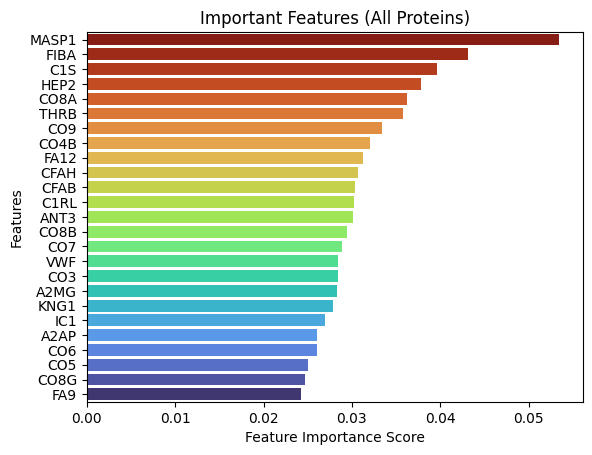

In [425]:
import seaborn as sns
# Select top 20 features
top_features_prot_rf = fimp_df_prot_rf.head(25)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot_rf.index,
    data=top_features_prot_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (All Proteins)')
plt.show()


**Protein combined**

In [426]:
# Collect feature importances
lr_coefs_prot_comb = np.array([est.coef_[0] for est in lr_cv_res_prot_comb["estimator"]])
lr_mean_coef_prot_comb = np.mean(np.abs(lr_coefs_prot_comb), axis=0)


fimp_df_prot_lr_comb = pd.DataFrame({
    "mean_importance": lr_mean_coef_prot_comb,
}, index= X_prot_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-3678140868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


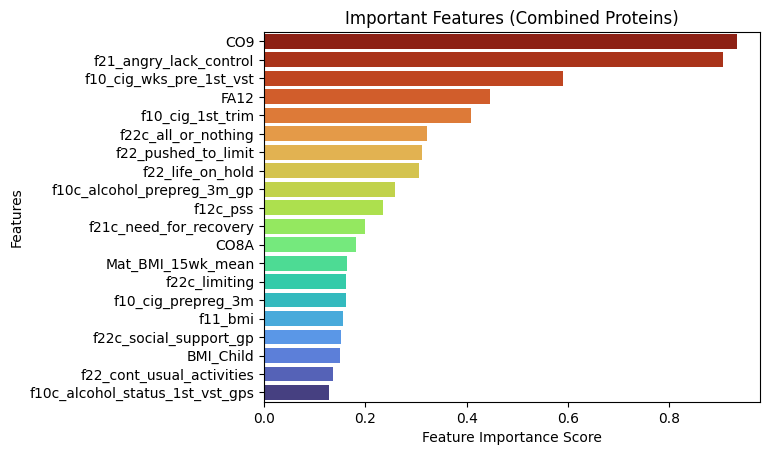

In [427]:
import seaborn as sns
# Select top 20 features
top_features_prot_comb = fimp_df_prot_lr_comb.head(20)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot_comb.index,
    data=top_features_prot_comb,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Proteins)')
plt.show()


In [428]:
# Collect feature importances (RF)

rf_importances_prot_comb = np.array([est.feature_importances_ for est in rf_cv_res_prot_comb["estimator"]])
rf_mean_importance_prot_comb = np.mean(rf_importances_prot_comb, axis=0)

fimp_df_prot_comb_rf = pd.DataFrame({
    "mean_importance": rf_mean_importance_prot_comb,
}, index= X_prot_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-4140193439.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


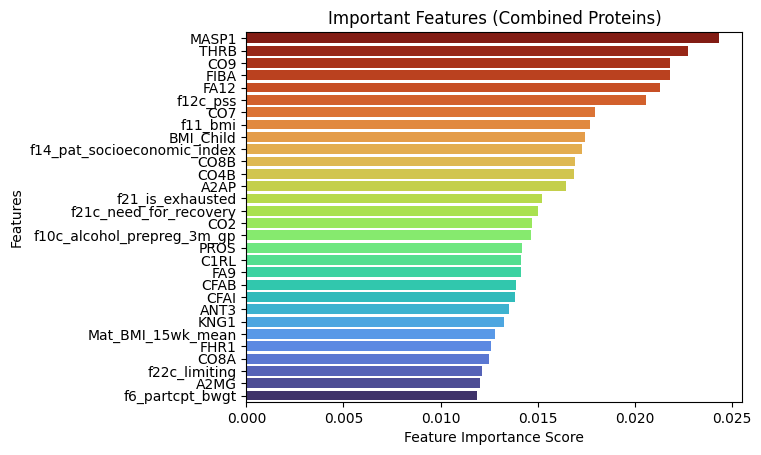

In [429]:
import seaborn as sns
# Select top 20 features
top_features_prot_comb_rf = fimp_df_prot_comb_rf.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot_comb_rf.index,
    data=top_features_prot_comb_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Proteins)')
plt.show()


**Protein and Protein combined (top20)**

In [430]:
# Collect feature importances
lr_coefs_prot_comb_t20 = np.array([est.coef_[0] for est in top20_lr_prot_comb["estimator"]])
lr_mean_coef_prot_comb_t20 = np.mean(np.abs(lr_coefs_prot_comb_t20), axis=0)


fimp_df_prot_lr_comb_t20 = pd.DataFrame({
    "mean_importance": lr_mean_coef_prot_comb_t20,
}, index= X_lr_top20_prot_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-118882759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


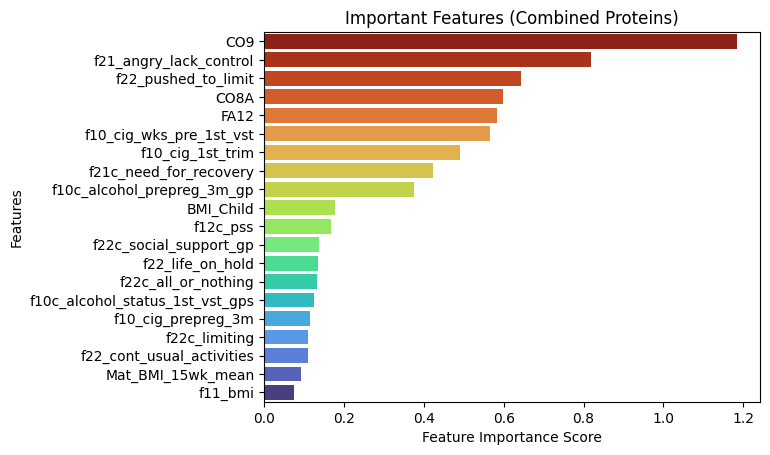

In [431]:
import seaborn as sns
# Select top 20 features
top_features_prot_comb_lr_t20= fimp_df_prot_lr_comb_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot_comb_lr_t20.index,
    data=top_features_prot_comb_lr_t20,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Proteins)')
plt.show()


In [432]:
# Collect feature importances (RF)

rf_importances_prot_comb_t20 = np.array([est.feature_importances_ for est in top20_rfc_prot_comb["estimator"]])
rf_mean_importance_prot_comb_t20 = np.mean(rf_importances_prot_comb_t20, axis=0)

fimp_df_prot_comb_rf_t20 = pd.DataFrame({
    "mean_importance": rf_mean_importance_prot_comb_t20,
}, index= X_rf_top20_prot_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-3315900097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


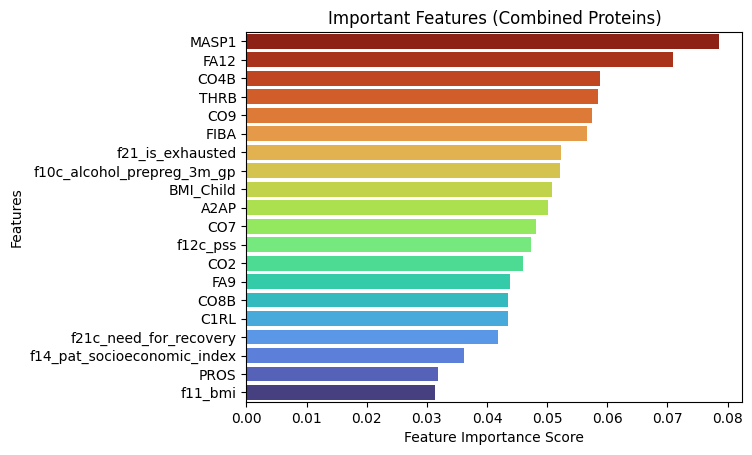

In [433]:
import seaborn as sns
# Select top 20 features
top_features_prot_comb_rf_t20= fimp_df_prot_comb_rf_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_prot_comb_rf_t20.index,
    data=top_features_prot_comb_rf_t20,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Proteins)')
plt.show()

## **Feature Importance for best models (peptides)**

**Peptide and Peptide combined**

In [434]:
# Collect feature importances (LR)
coefs_pep = np.array([est.coef_[0] for est in lr_cv_res_pep["estimator"]])
mean_coef_pep = np.mean(np.abs(coefs_pep), axis=0)


fimp_df_pep_lr = pd.DataFrame({
    "mean_importance": mean_coef_pep,
}, index= X_pep.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-3335602904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


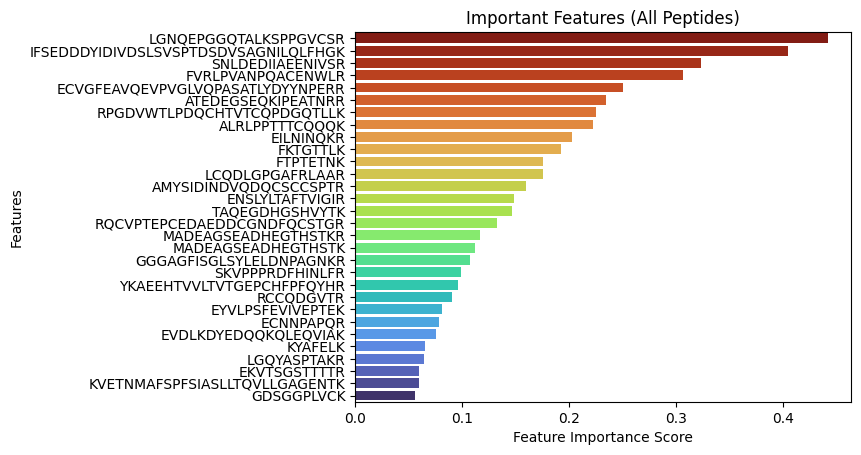

In [435]:
import seaborn as sns
# Select top 20 features
top_features_pep = fimp_df_pep_lr.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep.index,
    data=top_features_pep,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (All Peptides)')
plt.show()


In [436]:
# Collect feature importances (RF)

rf_importances_pep = np.array([est.feature_importances_ for est in rf_cv_res_pep["estimator"]])
rf_mean_importance_pep = np.mean(rf_importances_pep, axis=0)

fimp_df_pep_rf = pd.DataFrame({
    "mean_importance": rf_mean_importance_pep,
}, index= X_pep.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-2065857095.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


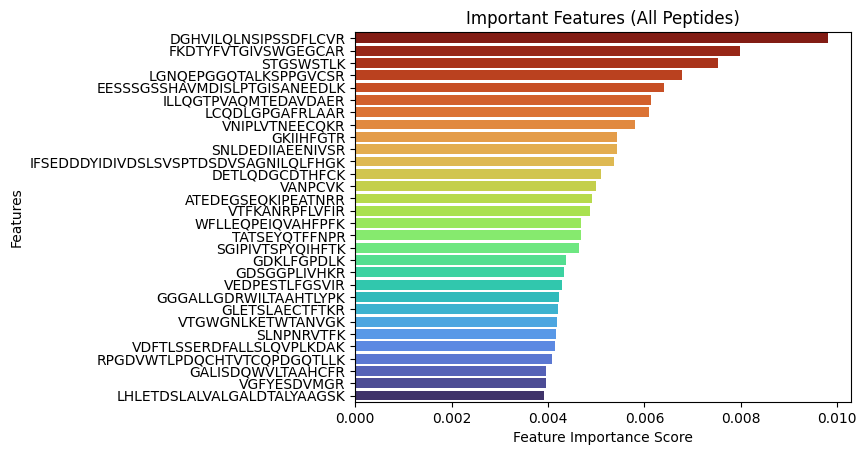

In [437]:
import seaborn as sns
# Select top 20 features
top_features_pep_rf = fimp_df_pep_rf.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_rf.index,
    data=top_features_pep_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (All Peptides)')
plt.show()


In [438]:
# Collect feature importances (LR)
coefs_pep_comb = np.array([est.coef_[0] for est in lr_cv_res_pep_comb["estimator"]])
mean_coef_pep_comb = np.mean(np.abs(coefs_pep_comb), axis=0)


fimp_df_pep_comb_lr = pd.DataFrame({
    "mean_importance": mean_coef_pep_comb,
}, index= X_pep_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-3153649927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


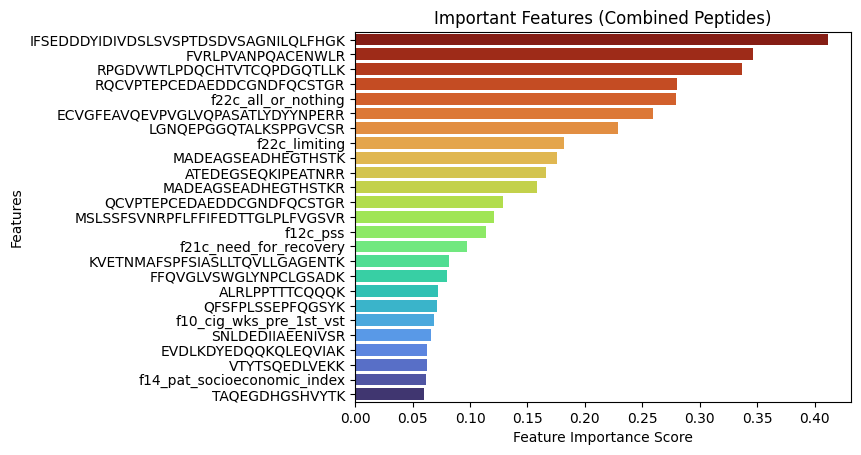

In [439]:
import seaborn as sns
# Select top 20 features
top_features_pep_comb_lr = fimp_df_pep_comb_lr.head(25)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_comb_lr.index,
    data=top_features_pep_comb_lr,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Peptides)')
plt.show()


In [440]:
# Collect feature importances (RF)

rf_importances_pep_comb = np.array([est.feature_importances_ for est in rf_cv_res_pep_comb["estimator"]])
rf_mean_importance_pep_comb = np.mean(rf_importances_pep_comb, axis=0)

fimp_df_pep_rf_comb = pd.DataFrame({
    "mean_importance": rf_mean_importance_pep_comb,
}, index= X_pep_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-1080268364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


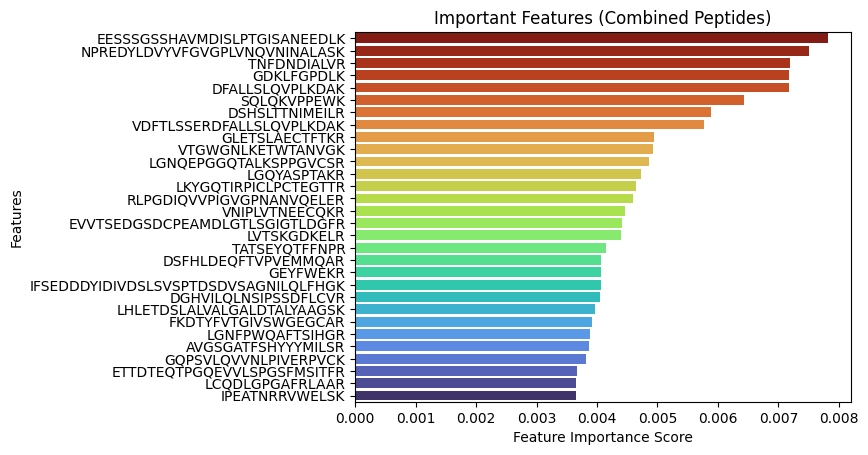

In [441]:
import seaborn as sns
# Select top 20 features
top_features_pep_comb_rf = fimp_df_pep_rf_comb.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_comb_rf.index,
    data=top_features_pep_comb_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Peptides)')
plt.show()


**Peptide and Peptide combined (top20)**

In [442]:
# Collect feature importances
lr_coefs_pep_t20 = np.array([est.coef_[0] for est in top20_lr_pep["estimator"]])
lr_mean_coef_pep_t20 = np.mean(np.abs(lr_coefs_pep_t20), axis=0)


fimp_df_prot_lr_t20 = pd.DataFrame({
    "mean_importance": lr_mean_coef_pep_t20,
}, index= X_lr_top20_pep.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-3600293929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


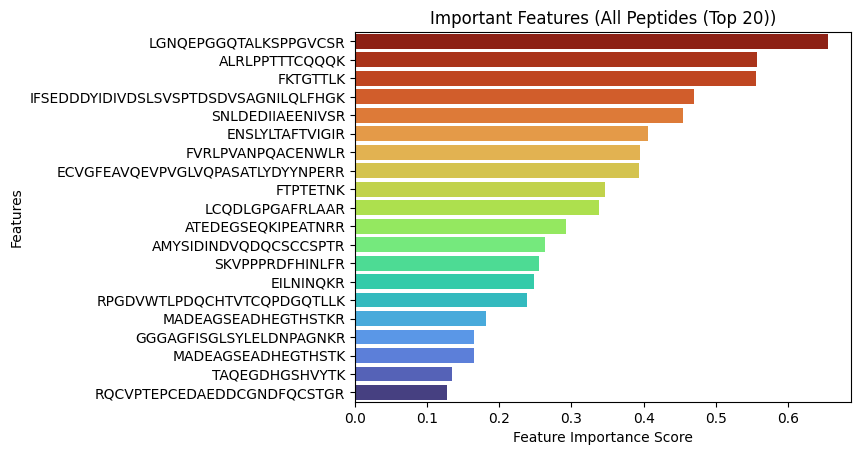

In [443]:
# Select top 20 features
top_features_pep_t20 = fimp_df_prot_lr_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_t20.index,
    data=top_features_pep_t20,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (All Peptides (Top 20))')
plt.show()


In [444]:
# Collect feature importances (RF)

rf_importances_pep_t20 = np.array([est.feature_importances_ for est in top20_rfc_pep["estimator"]])
rf_mean_importance_pep_t20 = np.mean(rf_importances_pep_t20, axis=0)

fimp_df_pep_rf_t20 = pd.DataFrame({
    "mean_importance": rf_mean_importance_pep_t20,
}, index= X_rf_top20_pep.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-2445261955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


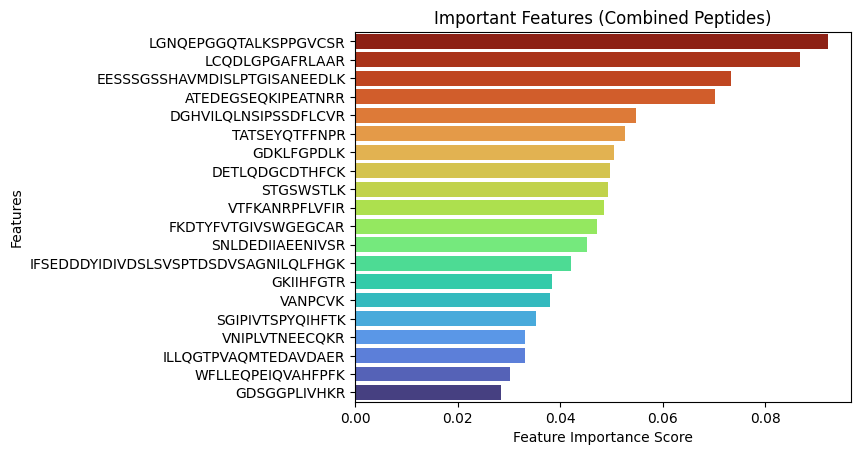

In [445]:
# Select top 20 features
top_features_pep_t20_rf = fimp_df_pep_rf_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_t20_rf.index,
    data=top_features_pep_t20_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Peptides)')
plt.show()


In [446]:
# Collect feature importances
lr_coefs_pep_comb_t20 = np.array([est.coef_[0] for est in top20_lr_pep_comb["estimator"]])
lr_mean_coef_pep_comb_t20 = np.mean(np.abs(lr_coefs_pep_comb_t20), axis=0)


fimp_df_pep_comb_lr_t20 = pd.DataFrame({
    "mean_importance": lr_mean_coef_pep_comb_t20,
}, index= X_lr_top20_pep_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-2212598927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


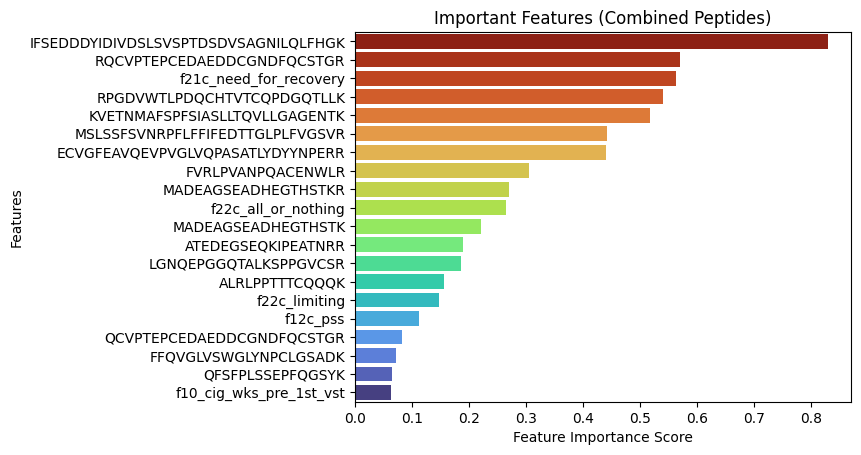

In [447]:
# Select top 20 features
top_features_pep_comb_t20_lr = fimp_df_pep_comb_lr_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_comb_t20_lr.index,
    data=top_features_pep_comb_t20_lr,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Peptides)')
plt.show()

In [448]:
# Collect feature importances (RF)

rf_importances_pep_comb_t20 = np.array([est.feature_importances_ for est in top20_rfc_pep_comb["estimator"]])
rf_mean_importance_pep_comb_t20 = np.mean(rf_importances_pep_t20, axis=0)

fimp_df_pep_comb_rf_t20 = pd.DataFrame({
    "mean_importance": rf_mean_importance_pep_comb_t20,
}, index= X_rf_top20_pep_comb.columns).sort_values("mean_importance", ascending=False)

/tmp/ipython-input-1055555104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


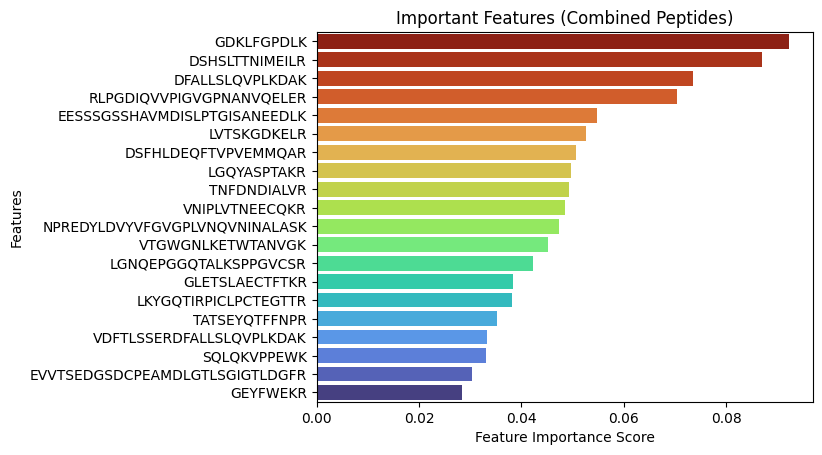

In [449]:
# Select top 20 features
top_features_pep_comb_t20_rf = fimp_df_pep_comb_rf_t20.head(30)

#Plot feature importances
plt.figure()
sns.barplot(
    x="mean_importance",
    y=top_features_pep_comb_t20_rf.index,
    data=top_features_pep_comb_t20_rf,
    palette='turbo_r'
)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (Combined Peptides)')
plt.show()

# **Serum Analysis Models**

In [450]:
##PiRAMiD (serum)
#Full set of proteins
PM_prot_full = pd.read_csv(url)

#Full set of peptides
PM_pep_full = pd.read_csv(url)

#Proteins + Clinical (combined)
PM_prot_comb = pd.read_csv(url)
#Peptides + Clinical (combined)
PM_pep_comb = pd.read_csv(url)


# #Peptides (sig only)
# PM_pep_sig = pd.read_csv(url)


# #Peptides + Clinical (sig + clinical)
# PM_pep_sig_comb = pd.read_csv(url)

NameError: name 'url' is not defined